In [33]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import zipfile
import glob
import matplotlib.pyplot as plt

In [34]:
# Tahap 1: Ekstraksi Dataset Utama
# Define the path to the uploaded zip file
zip_file_path = './dataset.zip'  # Adjusted path to reflect local Jupyter environment
extracted_folder_path = './extracted_dataset/'


# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

1. zip_file_path = './dataset.zip'

- Menentukan lokasi file dataset.zip yang akan dibuka.

2. extracted_folder_path = './extracted_dataset/'

- Menentukan lokasi folder tujuan untuk menyimpan file-file yang ada di dalam zip setelah dibuka.

3. with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:

- Membuka file dataset.zip untuk dibaca.

4. zip_ref.extractall(extracted_folder_path)

Semua isi dari file dataset.zip akan dikeluarkan dan disimpan di folder extracted_dataset.

Kode ini membuka file zip dataset.zip, lalu mengeluarkan semua isinya ke folder extracted_dataset. Kalau folder itu belum ada, foldernya akan dibuat secara otomatis.

In [21]:
# Tahap 2: Ekstraksi Sub-Zip di dalam Dataset
# Define path to the dataset folder containing sub-zip files
dataset_folder_path = os.path.join(extracted_folder_path, 'dataset')

# Extract each zip file in the dataset folder
for sub_zip_path in glob.glob(os.path.join(dataset_folder_path, "*.zip")):
    with zipfile.ZipFile(sub_zip_path, 'r') as sub_zip_ref:
        sub_zip_ref.extractall(dataset_folder_path)


Kode ini memeriksa apakah ada file zip lain di dalam folder dataset yang sebelumnya sudah diekstrak. Jika ada, semua isi dari file zip kecil tersebut akan dibuka dan disimpan di folder yang sama (dataset). Jadi, ini seperti membuka "zip di dalam zip".

In [22]:
# Tahap 3: Data Understanding
# Definisi Folder Dataset yang Telah Diekstrak
folders = {
    'BatakKaro': os.path.join(dataset_folder_path, 'Dataset BatakKaro'),
    'BatakSimalungun': os.path.join(dataset_folder_path, 'Dataset BatakSimalungun'),
    'sadumangkola': os.path.join(dataset_folder_path, 'Dataset sadumangkola')
}

# Initialize empty lists to store images and labels
images = []
labels = []
image_counts = {}

Kode ini mempersiapkan struktur folder dataset dan membuat tempat penyimpanan sementara (images, labels, image_counts) untuk memulai eksplorasi data. Dengan struktur ini, nantinya gambar-gambar dapat dimuat dan dilabeli sesuai kategori.

In [23]:

# Load images from each folder and gather data information
for label, folder_path in folders.items():
    count = 0
    for image_path in glob.glob(os.path.join(folder_path, "*.jpg")):  # Assuming images are in JPG format
        count += 1
        # Read the image
        image = cv2.imread(image_path)
        if image is None:
            continue  # Skip if the image cannot be read
        # Resize image to a smaller size for faster processing
        image = cv2.resize(image, (64, 64))
        # Convert image to a 1D feature vector
        feature_vector = image.flatten()
        # Append feature vector and label to respective lists
        images.append(feature_vector)
        labels.append(label)
    image_counts[label] = count


Kode ini membaca gambar dari setiap folder, mengubahnya menjadi format yang lebih sederhana (vektor 1D), lalu menyimpannya bersama labelnya. Selain itu, kode ini juga mencatat jumlah gambar yang berhasil diproses di setiap kategori.

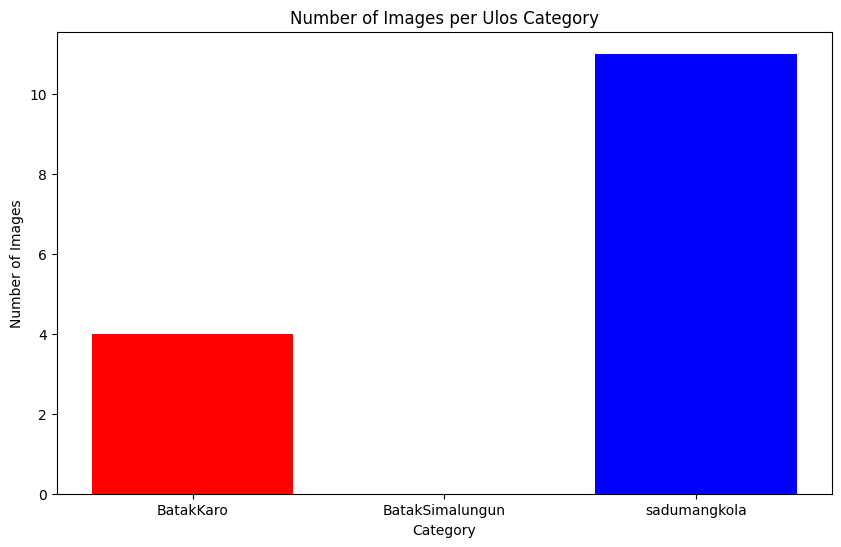

In [24]:

# Visualize the number of images per category
plt.figure(figsize=(10, 6))
plt.bar(image_counts.keys(), image_counts.values(), color=['red', 'green', 'blue'])
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.title('Number of Images per Ulos Category')
plt.show()

Kode ini membuat diagram batang yang menunjukkan jumlah gambar di setiap kategori dataset ulos (BatakKaro, BatakSimalungun, sadumangkola). Diagram ini memudahkan pemahaman tentang distribusi jumlah gambar di antara kategori.

In [25]:

# Tahap 4: Mengubah List Menjadi Array
# Convert lists to numpy arrays
if len(images) == 0 or len(labels) == 0:
    raise ValueError("Dataset is empty. Please check the dataset paths and ensure they contain valid images.")

X = np.array(images)
y = np.array(labels)

In [26]:

# Tahap 5: Pembagian Dataset (Training dan Testing)
# Split the dataset into training and testing sets (80% train, 20% test)
if len(y) < 2:
    raise ValueError("Not enough samples to split into training and testing sets. Please provide more data.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:

# Tahap 6: Melatih Model KNN
# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [28]:

# Tahap 7: Evaluasi Model
# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model KNN: {accuracy * 100:.2f}%')


Akurasi Model KNN: 66.67%


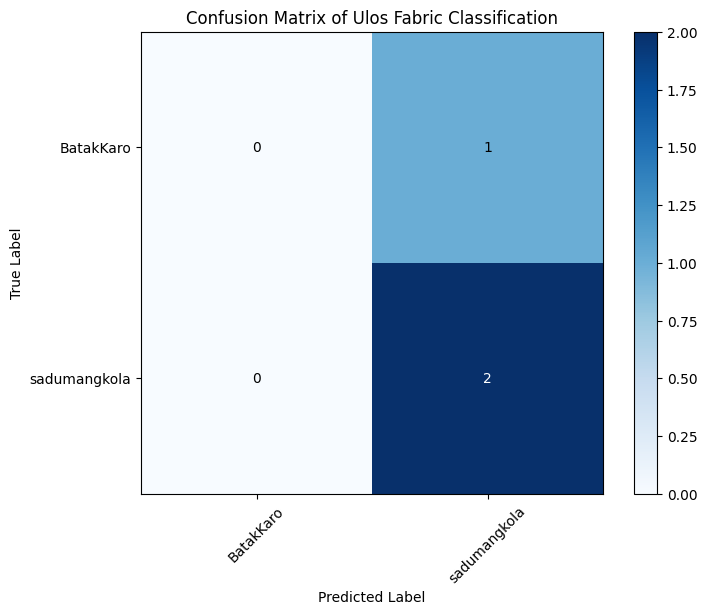

In [32]:

# Confusion Matrix
unique_labels = np.unique(np.concatenate((y_test, y_pred)))
conf_matrix = confusion_matrix(y_test, y_pred, labels=unique_labels)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap='Blues')
plt.colorbar()
tick_marks = np.arange(len(unique_labels))
plt.xticks(tick_marks, unique_labels, rotation=45)
plt.yticks(tick_marks, unique_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Ulos Fabric Classification')

# Annotate confusion matrix
thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             ha="center", va="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.show()